# Lingga Rizki Mandala


**Video Game Sales**

**Import** data dari kaggle
https://www.kaggle.com/datasets/gregorut/videogamesales

# 1. import module

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 2. import source

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/12K8CAp5wdT9whnr9KW4TVMyl1hg1DQsP42zgJF1zBSo/edit#gid=1481686379'
sheet_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 3. Checking dataframe info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 4. Cleaning Data

## a. Fill NA Publisher

In [ ]:
df_coba = df.copy()
df_coba['Publisher'] = df_coba['Publisher'].fillna('NA')   #==> mengisi nilai null pada kolom publisher
df_coba.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## b. Replace NA Year to null

In [ ]:
df_coba['Year'] = df_coba['Year'].astype('Int64')          #==> mengubah dtype year
df_coba['Year'] = df_coba['Year'].replace(['N/A'], ' ')    #==> mengganti nilai N/A menjadi kosong pada kolom year
#df_update = df_coba.dropna(subset=['Year'])               #==> menghapus baris data yang tidak ada nilai di kolom year
df_coba.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## c. Crosscheck

In [ ]:
df_coba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df_coba.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# 5. Listing Platform, Tahun rilis, Genre, & Publisher

## Platform

In [ ]:
for platform in ['Platform']:
    print(df_coba[platform].value_counts(sort=True))

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


## Year

In [ ]:
for year in ['Year']:
    print(df_coba[year].value_counts(sort=True))

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: Int64


## Genre

In [ ]:
for genre in ['Genre']:
    print(df_coba[genre].value_counts(sort=True))

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


## Publisher

In [ ]:
for publisher in ['Publisher']:
    print(df_coba[publisher].value_counts(sort=True))

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Glams                              1
Locus                              1
Warp                               1
Elite                              1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64


# 6. Identify Release Games

## a. Game tahun rilis tertua

In [ ]:
#menghapus value NA pada kolom Year agar bisa mendeteksi tahun awal dan tahun akhir game yang dirilis
rilis_game = df_coba.dropna(subset=['Year'])    

#rilis game tertua
rilis_game = rilis_game.sort_values(by='Year')
rilis_game.iloc[0]

Rank                6898
Name            Checkers
Platform            2600
Year                1980
Genre               Misc
Publisher          Atari
NA_Sales            0.22
EU_Sales            0.01
JP_Sales             0.0
Other_Sales          0.0
Global_Sales        0.24
Name: 6896, dtype: object

## b. Game tahun rilis terakhir

In [ ]:
rilis_game.iloc[-1]

Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                              2020
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                           0.0
JP_Sales                           0.0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object

## c. Judul game  terbanyak dari semua platform

In [ ]:
rilis_game.groupby(['Name'])['Platform'].count().nlargest(5)

Name
Need for Speed: Most Wanted    12
FIFA 14                         9
LEGO Marvel Super Heroes        9
Ratatouille                     9
Angry Birds Star Wars           8
Name: Platform, dtype: int64

## d. kategori 10 game terbanyak tahun 2008 & 2009

In [ ]:
df_coba[df_coba['Year'] == 2008].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
98,99,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.37
118,119,Gears of War 2,X360,2008,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76
144,145,Metal Gear Solid 4: Guns of the Patriots,PS3,2008,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03
148,149,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
161,162,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50


In [ ]:
df_coba[df_coba['Year'] == 2009].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
55,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
83,84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
102,103,Just Dance,Wii,2009,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
119,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
133,134,Halo 3: ODST,X360,2009,Shooter,Microsoft Game Studios,4.34,1.35,0.06,0.61,6.36


# 7. Histogram Top 10 Global Sales Games

## Nintendo DS

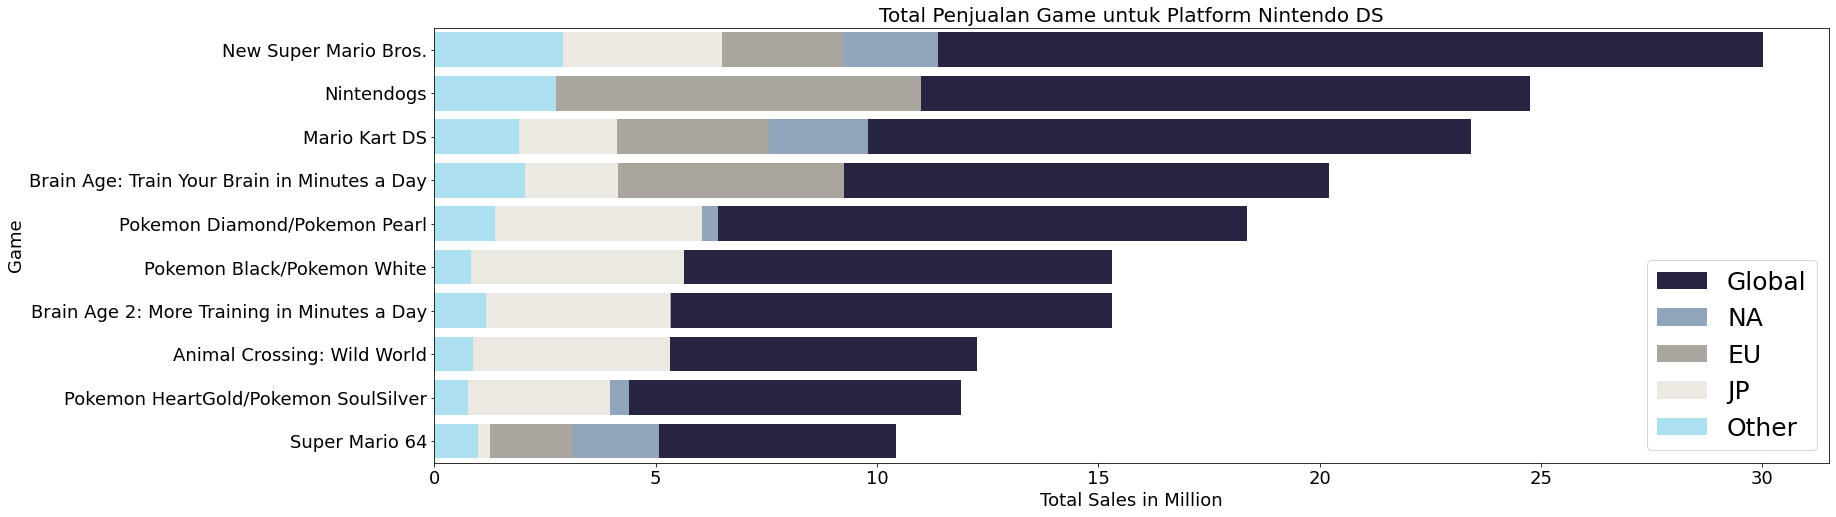

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,8))  

#title         
plt.title('Total Penjualan Game untuk Platform Nintendo DS', fontsize=20)

#data histogram
sns.set_color_codes('pastel')
sns_global = sns.barplot(x='Global_Sales', y='Name', label = 'Global', color = '#231F47', data=df_coba[df_coba.Platform == 'DS'].iloc[:10])
sns_na     = sns.barplot(x='NA_Sales', y='Name', label = 'NA', color = '#89A4C3', data=df_coba[df_coba.Platform == 'DS'].iloc[:10])
sns_eu     = sns.barplot(x='EU_Sales', y='Name', label = 'EU', color = '#ACA79B', data=df_coba[df_coba.Platform == 'DS'].iloc[:10])
sns_jp     = sns.barplot(x='JP_Sales', y='Name', label = 'JP', color = '#EDE8E1', data=df_coba[df_coba.Platform == 'DS'].iloc[:10])
sns_other  = sns.barplot(x='Other_Sales', y='Name', label = 'Other', color = '#A0E6FD', data=df_coba[df_coba.Platform == 'DS'].iloc[:10])

#fontsize & label histogram
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Total Sales in Million', fontsize=18)
plt.ylabel('Game', fontsize=18)

#kotak legend
plt.legend(loc='lower right', frameon=True, fontsize=20, prop={'size':25})
plt.show()

## Playstation 2

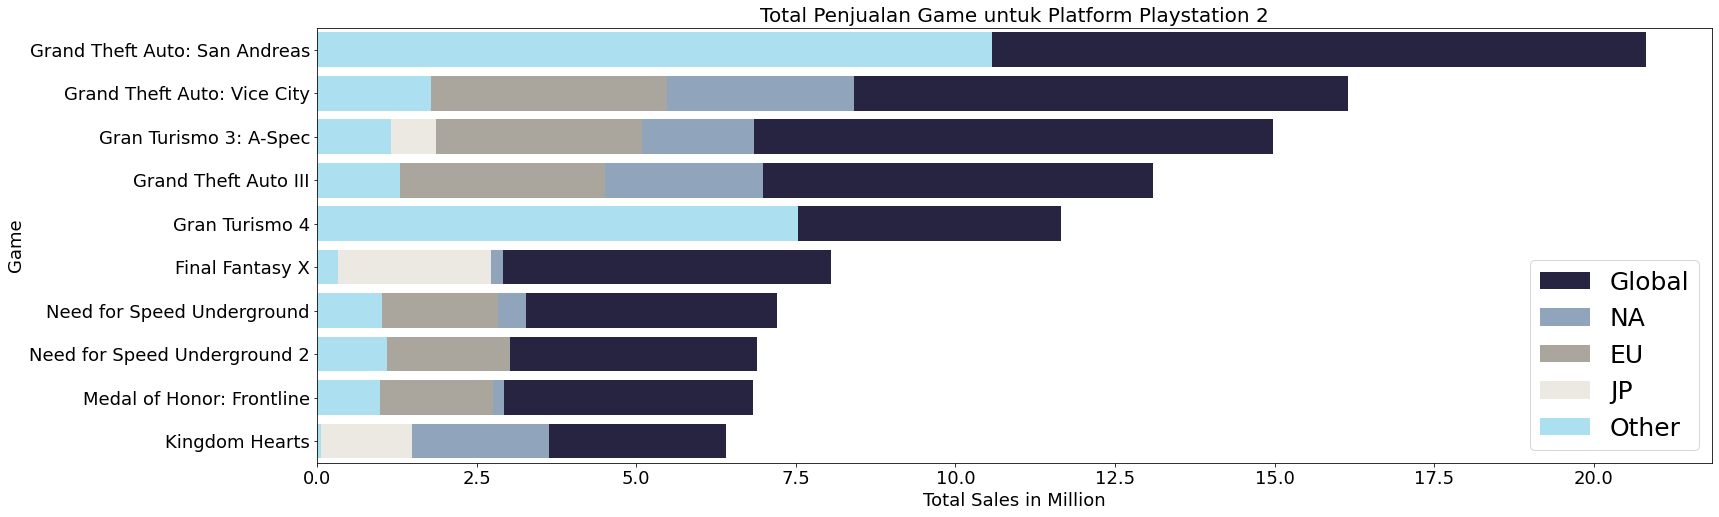

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,8))  

#title         
plt.title('Total Penjualan Game untuk Platform Playstation 2', fontsize=20)

#data histogram
sns.set_color_codes('pastel')
sns_global = sns.barplot(x='Global_Sales', y='Name', label = 'Global', color = '#231F47', data=df_coba[df_coba.Platform == 'PS2'].iloc[:10])
sns_na     = sns.barplot(x='NA_Sales', y='Name', label = 'NA', color = '#89A4C3', data=df_coba[df_coba.Platform == 'PS2'].iloc[:10])
sns_eu     = sns.barplot(x='EU_Sales', y='Name', label = 'EU', color = '#ACA79B', data=df_coba[df_coba.Platform == 'PS2'].iloc[:10])
sns_jp     = sns.barplot(x='JP_Sales', y='Name', label = 'JP', color = '#EDE8E1', data=df_coba[df_coba.Platform == 'PS2'].iloc[:10])
sns_other  = sns.barplot(x='Other_Sales', y='Name', label = 'Other', color = '#A0E6FD', data=df_coba[df_coba.Platform == 'PS2'].iloc[:10])

#fontsize & label histogram
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Total Sales in Million', fontsize=18)
plt.ylabel('Game', fontsize=18)

#kotak legend
plt.legend(loc='lower right', frameon=True, fontsize=20, prop={'size':25})
plt.show()

## Playstation 3

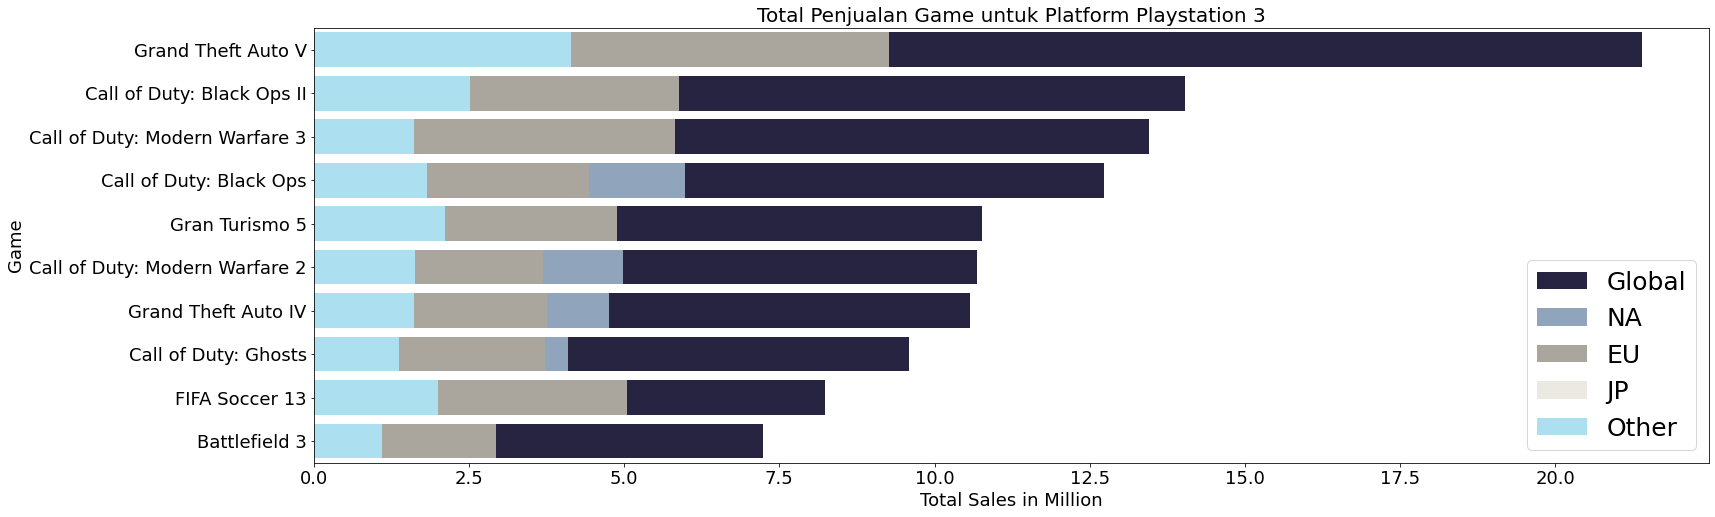

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,8))  

#title         
plt.title('Total Penjualan Game untuk Platform Playstation 3', fontsize=20)

#data histogram
sns.set_color_codes('pastel')
sns_global = sns.barplot(x='Global_Sales', y='Name', label = 'Global', color = '#231F47', data=df_coba[df_coba.Platform == 'PS3'].iloc[:10])
sns_na     = sns.barplot(x='NA_Sales', y='Name', label = 'NA', color = '#89A4C3', data=df_coba[df_coba.Platform == 'PS3'].iloc[:10])
sns_eu     = sns.barplot(x='EU_Sales', y='Name', label = 'EU', color = '#ACA79B', data=df_coba[df_coba.Platform == 'PS3'].iloc[:10])
sns_jp     = sns.barplot(x='JP_Sales', y='Name', label = 'JP', color = '#EDE8E1', data=df_coba[df_coba.Platform == 'PS3'].iloc[:10])
sns_other  = sns.barplot(x='Other_Sales', y='Name', label = 'Other', color = '#A0E6FD', data=df_coba[df_coba.Platform == 'PS3'].iloc[:10])

#fontsize & label histogram
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Total Sales in Million', fontsize=18)
plt.ylabel('Game', fontsize=18)

#kotak legend
plt.legend(loc='lower right', frameon=True, fontsize=20, prop={'size':25})
plt.show()

## Nintendo Wii

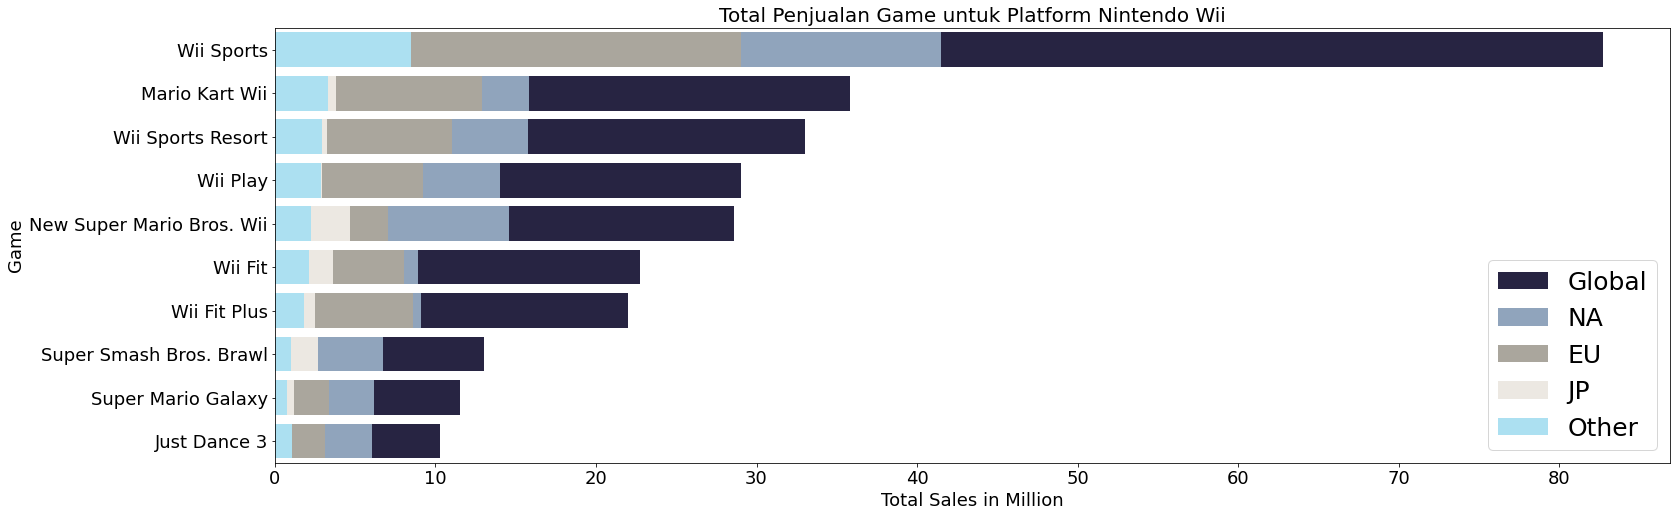

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,8))  

#title         
plt.title('Total Penjualan Game untuk Platform Nintendo Wii', fontsize=20)

#data histogram
sns.set_color_codes('pastel')
sns_global = sns.barplot(x='Global_Sales', y='Name', label = 'Global', color = '#231F47', data=df_coba[df_coba.Platform == 'Wii'].iloc[:10])
sns_na     = sns.barplot(x='NA_Sales', y='Name', label = 'NA', color = '#89A4C3', data=df_coba[df_coba.Platform == 'Wii'].iloc[:10])
sns_eu     = sns.barplot(x='EU_Sales', y='Name', label = 'EU', color = '#ACA79B', data=df_coba[df_coba.Platform == 'Wii'].iloc[:10])
sns_jp     = sns.barplot(x='JP_Sales', y='Name', label = 'JP', color = '#EDE8E1', data=df_coba[df_coba.Platform == 'Wii'].iloc[:10])
sns_other  = sns.barplot(x='Other_Sales', y='Name', label = 'Other', color = '#A0E6FD', data=df_coba[df_coba.Platform == 'Wii'].iloc[:10])

#fontsize & label histogram
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Total Sales in Million', fontsize=18)
plt.ylabel('Game', fontsize=18)

#kotak legend
plt.legend(loc='lower right', frameon=True, fontsize=20, prop={'size':25})
plt.show()

## Xbox 360

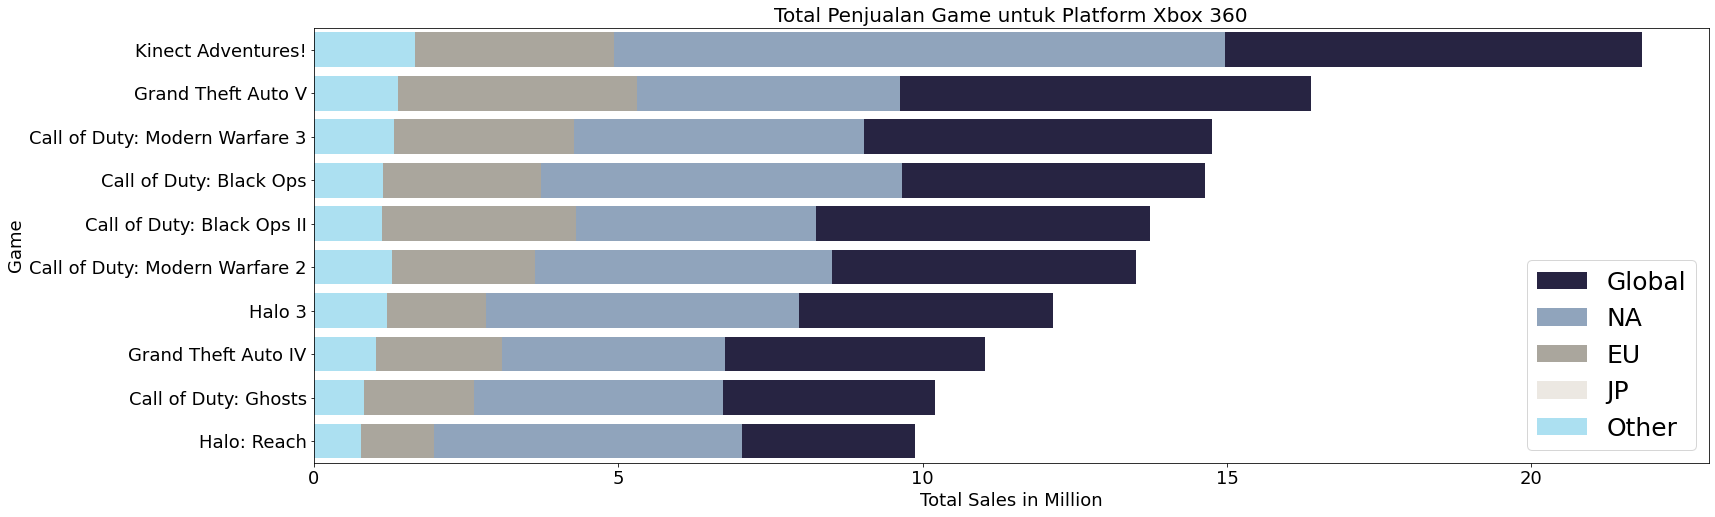

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,8))  

#title         
plt.title('Total Penjualan Game untuk Platform Xbox 360', fontsize=20)

#data histogram
sns.set_color_codes('pastel')
sns_global = sns.barplot(x='Global_Sales', y='Name', label = 'Global', color = '#231F47', data=df_coba[df_coba.Platform == 'X360'].iloc[:10])
sns_na     = sns.barplot(x='NA_Sales', y='Name', label = 'NA', color = '#89A4C3', data=df_coba[df_coba.Platform == 'X360'].iloc[:10])
sns_eu     = sns.barplot(x='EU_Sales', y='Name', label = 'EU', color = '#ACA79B', data=df_coba[df_coba.Platform == 'X360'].iloc[:10])
sns_jp     = sns.barplot(x='JP_Sales', y='Name', label = 'JP', color = '#EDE8E1', data=df_coba[df_coba.Platform == 'X360'].iloc[:10])
sns_other  = sns.barplot(x='Other_Sales', y='Name', label = 'Other', color = '#A0E6FD', data=df_coba[df_coba.Platform == 'X360'].iloc[:10])

#fontsize & label histogram
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Total Sales in Million', fontsize=18)
plt.ylabel('Game', fontsize=18)

#kotak legend
plt.legend(loc='lower right', frameon=True, fontsize=20, prop={'size':25})
plt.show()

# 8. Total Game Sales in Platform, Genre, and Publisher

## a. Platform

In [ ]:
total_platform = df_coba.groupby('Platform', as_index=False).agg({'NA_Sales':'sum', 
                                                                  'EU_Sales':'sum',
                                                                  'JP_Sales':'sum',
                                                                  'Other_Sales':'sum',
                                                                  'Global_Sales':'sum'})
total_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,90.60,5.47,0.00,0.91,97.08
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.46
3,DC,5.43,1.69,8.56,0.27,15.97
4,DS,390.71,194.65,175.57,60.53,822.49
5,GB,114.32,47.82,85.12,8.20,255.45
6,GBA,187.54,75.25,47.33,7.73,318.50
7,GC,133.46,38.71,21.58,5.18,199.36
8,GEN,19.27,5.52,2.67,0.89,28.36
9,GG,0.00,0.00,0.04,0.00,0.04


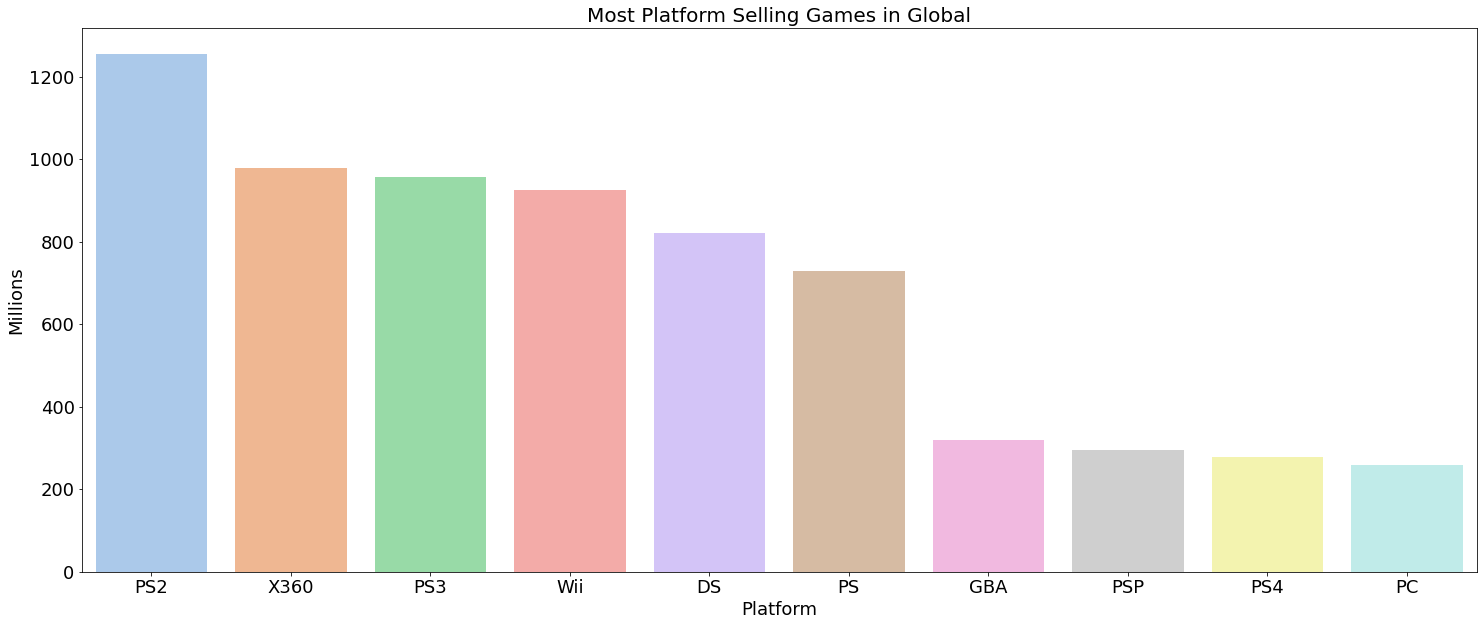

In [ ]:
#ukuran histogram
plt.figure(figsize=(25,10))

#data histogram
sns.barplot(x = 'Platform', y = 'Global_Sales', palette = 'pastel', data = total_platform.sort_values('Global_Sales', ascending=False).iloc[:10])

#fontsize & labeling
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Millions', fontsize=18)

#title
plt.title('Most Platform Selling Games in Global', fontsize = 20)
plt.show()

## b. Genre

In [ ]:
total_genre = df_coba.groupby('Genre', as_index=False).agg({'NA_Sales':'sum', 
                                                            'EU_Sales':'sum',
                                                            'JP_Sales':'sum',
                                                            'Other_Sales':'sum',
                                                            'Global_Sales':'sum'})
total_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Adventure,105.80,64.13,52.07,16.81,239.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
3,Misc,410.24,215.98,107.76,75.32,809.96
4,Platform,447.05,201.63,130.77,51.59,831.37
5,Puzzle,123.78,50.78,57.31,12.55,244.95
6,Racing,359.42,238.39,56.69,77.27,732.04
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20


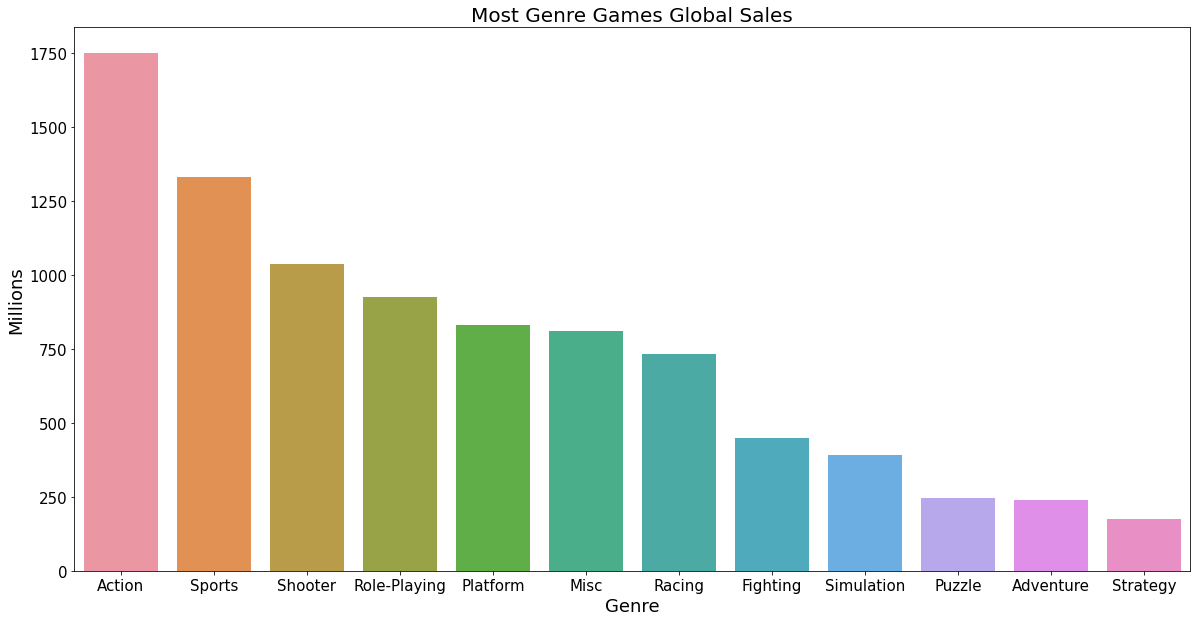

In [ ]:
#ukuran histogram
plt.figure(figsize=(20,10))

#data histogram
sns.barplot(x = 'Genre', y = 'Global_Sales', 
            data = total_genre.sort_values('Global_Sales', ascending=False))

#fontsize & labeling
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Millions', fontsize=18)

#title
plt.title('Most Genre Games Global Sales', fontsize=20)
plt.show()

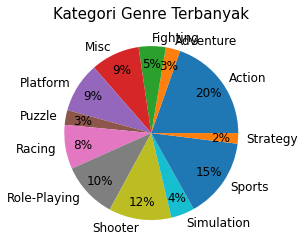

In [ ]:
plt.title('Kategori Genre Terbanyak', fontsize=15)

plt.pie(total_genre['Global_Sales'], 
        labels = total_genre['Genre'], 
        radius = 1,
        autopct='%1.f%%',
        pctdistance= 0.8,
        textprops = {'fontsize':12})
plt.show()

## c. Publisher

In [ ]:
total_publisher = df_coba.groupby('Publisher', as_index=False).agg({'NA_Sales':'sum', 'EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})
total_publisher.sort_values('Global_Sales', ascending=False).iloc[:10]

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
360,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
457,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
526,Ubisoft,253.43,163.32,7.50,50.26,474.72
495,Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
489,THQ,208.77,94.73,5.01,32.14,340.77
275,Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
447,Sega,109.40,82.00,57.03,24.52,272.99
348,Namco Bandai Games,69.52,42.63,127.07,14.69,254.09


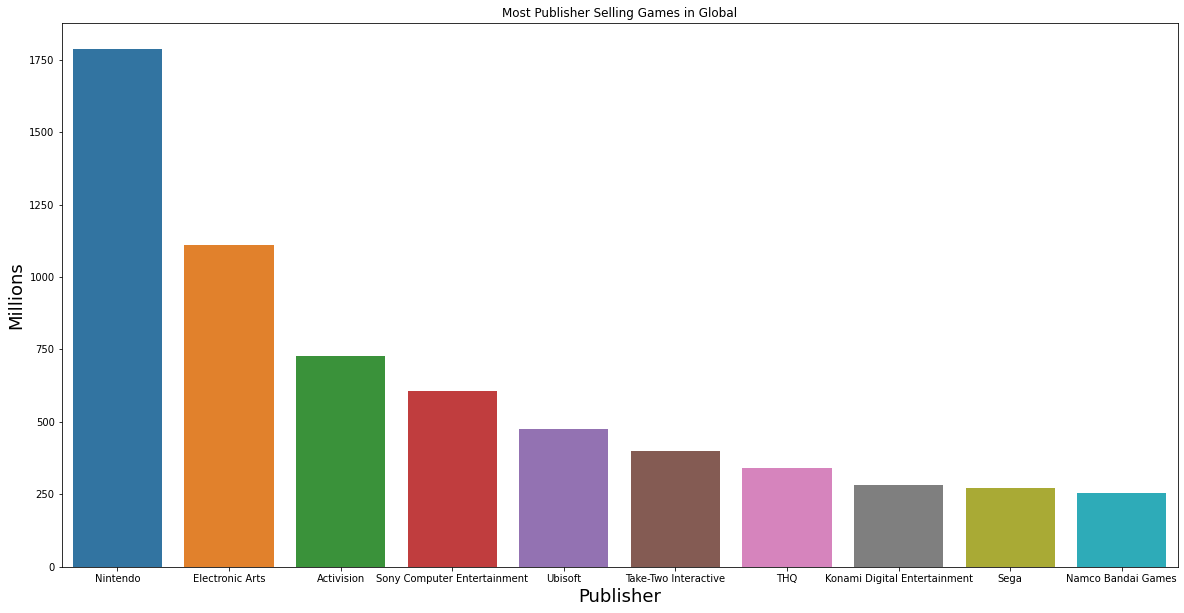

In [ ]:
#ukuran histogram
plt.figure(figsize=(20,10))

#data histogram
sns.barplot(x = 'Publisher', y = 'Global_Sales', data = total_publisher.sort_values('Global_Sales', ascending=False).iloc[:10])

#labeling & fontsize
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Publisher', fontsize=18)
plt.ylabel('Millions', fontsize=18)

#title
plt.title('Most Publisher Selling Games in Global')
plt.show()

# 9. Wordcloud publisher

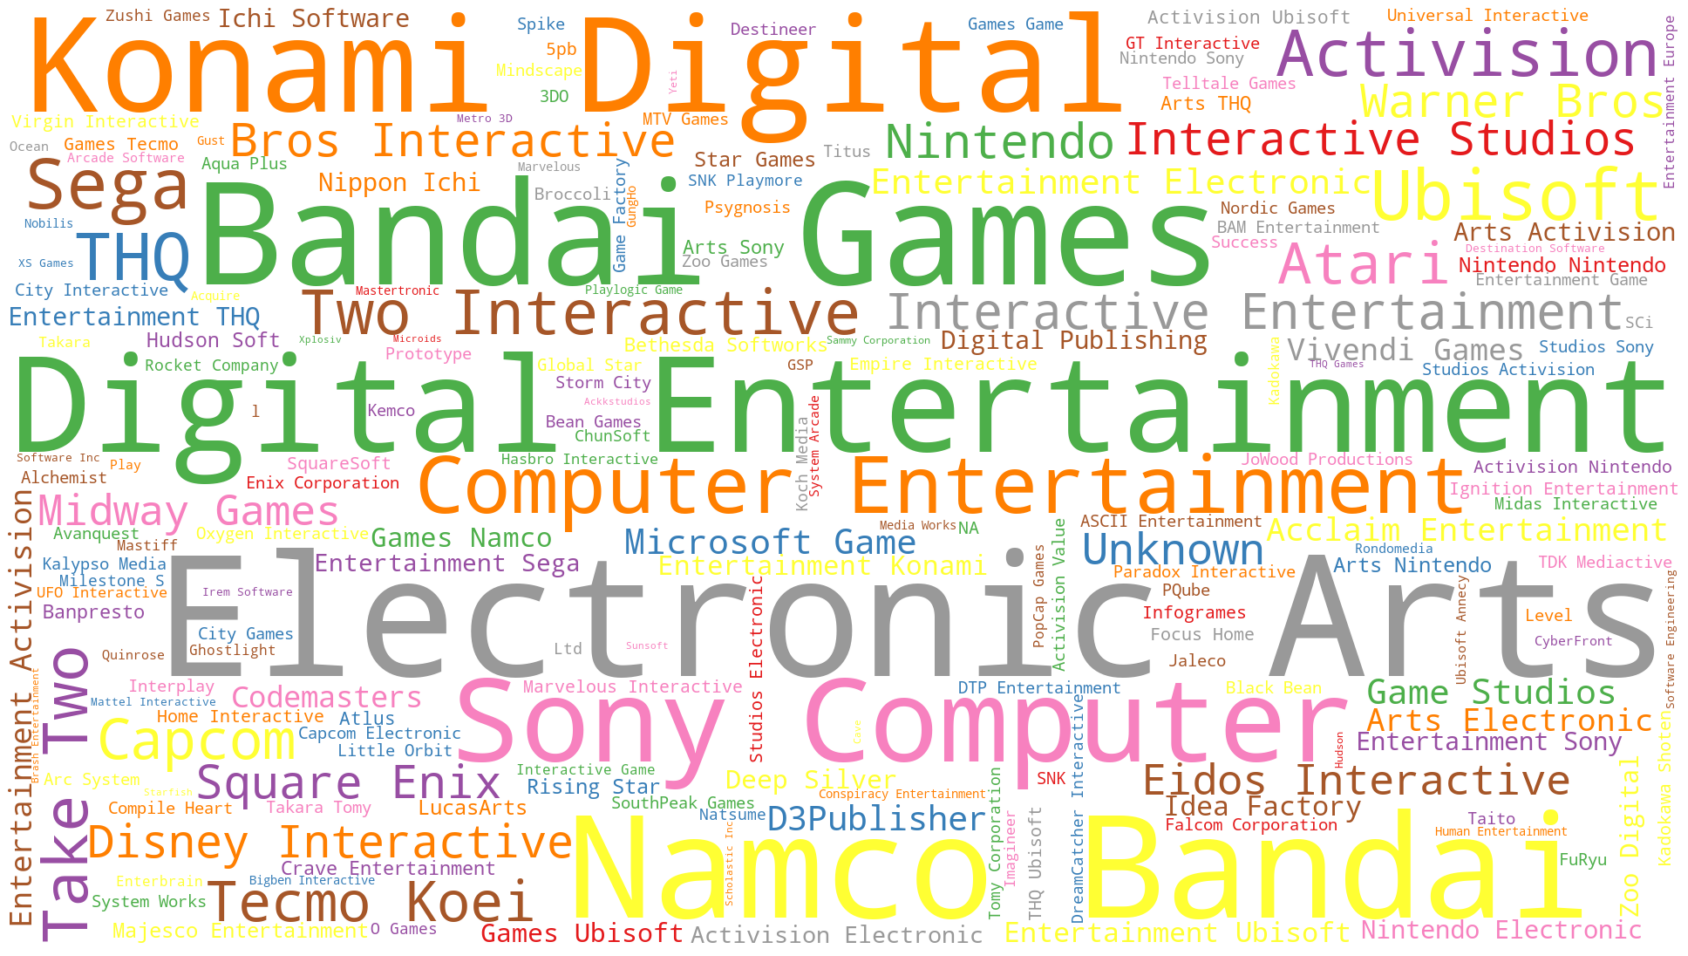

In [ ]:
#text publisher
text = ' '.join(str(each) for each in df_coba.Publisher)

#generating wordcloud
wordCloud = WordCloud(max_words=200, 
                      colormap='Set1', 
                      background_color='white', 
                      width=1920, 
                      height=1080)
wordCloud.generate(text)

#plt size
plt.figure(figsize=(30,20))
plt.imshow(wordCloud, interpolation='Bilinear')
plt.axis('off')

plt.show()

# 10. Export Data yang sudah di rapikan

In [ ]:
#df_coba.to_csv('nama_file.csv', index=False)

# Catatan tambahan

Tambahan unuk dataframe rilis_game menghapus null count pada kolom Year juga menghapus pada kolom yang lain, sehingga data entry berkurang

In [ ]:
df_coba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
rilis_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 6896 to 5957
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB
